In [ ]:
!pip3 install lang2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.2 MB 3.1 MB/s 


In [ ]:
import numpy as np
from numpy.linalg import norm
import seaborn as sns

In [ ]:
from operator import itemgetter

In [ ]:
import lang2vec.lang2vec as l2v

In [ ]:
def cos_sim(a, b):
  return np.dot(a, b)/ (norm(a) * norm(b))

In [ ]:
l2v.FEATURE_SETS

In [ ]:
len(l2v.LANGUAGES) 

4005

In [ ]:
languages = ['eng', 'fr', 'it', 'es', 'ro', 'de', 'nl', 'fin', 'hun', 'rus', 'tr', 'kor', 'pol']

In [ ]:
languages = list(l2v.LANGUAGES)

### Get features for the listed languages. (family, syntax, phonological)

In [ ]:
fam_features = l2v.get_features(languages, 'fam', header=True)

In [ ]:
syntax_features = l2v.get_features(languages, 'syntax_knn', header=True)

In [ ]:
phonology_features = l2v.get_features(languages, 'phonology_knn', header=True)

### Get distances from English

In [ ]:
fam_distances_to_en = [(lang, np.dot(fam_features['eng'], fam_features[lang])) for lang in languages]

In [ ]:
sorted(fam_distances_to_en, key=itemgetter(1), reverse=True)

[('eng', 9.0),
 ('de', 4.0),
 ('nl', 4.0),
 ('fr', 1.0),
 ('it', 1.0),
 ('es', 1.0),
 ('ro', 1.0),
 ('rus', 1.0),
 ('pol', 1.0),
 ('fin', 0.0),
 ('hun', 0.0),
 ('tr', 0.0),
 ('kor', 0.0)]

In [ ]:
syntax_distances_to_en = [(lang, cos_sim(syntax_features['eng'], syntax_features[lang])) for lang in languages]

In [ ]:
sorted(syntax_distances_to_en, key=itemgetter(1), reverse=True)

[('eng', 1.0000000000000002),
 ('nl', 0.9242930987335743),
 ('de', 0.9025419790150205),
 ('it', 0.85779415410156),
 ('es', 0.821593865540955),
 ('fr', 0.8117540630909458),
 ('rus', 0.8117540630909458),
 ('ro', 0.7959190572428002),
 ('pol', 0.7863867486193536),
 ('fin', 0.7107724707650862),
 ('hun', 0.6939542359352536),
 ('kor', 0.5528230328172893),
 ('tr', 0.5067117097095318)]

### Family distance matrix

In [ ]:
fam_matrix = np.zeros((len(languages), len(languages)))
for i, l1 in enumerate(languages):
  for j, l2 in enumerate(languages):
    fam_matrix[i][j] = np.dot(fam_features[l1], fam_features[l2])

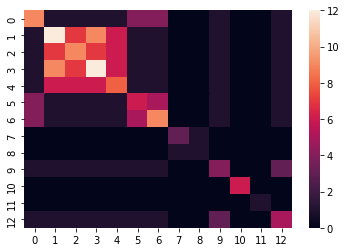

In [ ]:
ax = sns.heatmap(fam_matrix)

### Syntax distance matrix

In [ ]:
syntax_matrix = np.zeros((len(languages), len(languages)))
for i, l1 in enumerate(languages):
  for j, l2 in enumerate(languages):
    syntax_matrix[i][j] = cos_sim(syntax_features[l1], syntax_features[l2])

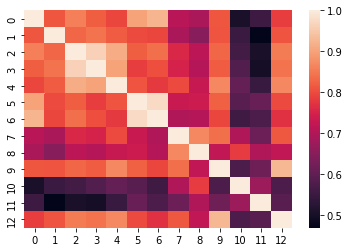

In [ ]:
ax = sns.heatmap(syntax_matrix)

### Tables for the dissertation

Phylogenetic table

In [ ]:
print(fam_features['CODE'])
print(fam_features['eng'])
print(fam_features['arb'])

['F_Austronesian', 'F_Nuclear_Austronesian', 'F_Malayo-Polynesian', 'F_Central-Eastern_Malayo-Polynesian', 'F_Eastern_Malayo-Polynesian', 'F_Oceanic', 'F_Western_Oceanic_linkage', 'F_North_New_Guinea_linkage', 'F_Huon_Gulf', 'F_Markham', 'F_Ainu', 'F_Atlantic-Congo', 'F_Volta-Congo', 'F_Kwa_Volta-Congo', 'F_Nyo', 'F_Potou-Tano', 'F_Tano', 'F_Central_Tano', 'F_Akanic', 'F_Muskogean', 'F_Alabaman-Koasati', 'F_Eskimo-Aleut', 'F_Mangarrayi-Maran', 'F_Maran', 'F_Indo-European', 'F_Albanian', 'F_Albanian-Tosk', 'F_Panoan', 'F_Mainline_Pano', 'F_Pano_Nawa', 'F_Headwaters', 'F_Arawakan', 'F_Western_Maipuran', 'F_Afro-Asiatic', 'F_Semitic', 'F_West_Semitic', 'F_Ethiosemitic', 'F_South_Ethiopic', 'F_Transversal_South_Ethiopic', 'F_Amharic-Argobba', 'F_Chadic', 'F_West_Chadic', 'F_West_Chadic_A', 'F_West_Chadic_A.2-3', 'F_West_Chadic_A_A.3', 'F_Pama-Nyungan', 'F_Desert_Nyungic', 'F_Wati', 'F_Unclassified_Wati', 'F_Nuclear-Macro-Je', 'F_Je', 'F_Je_Setentrional', 'F_Araucanian', 'F_Central_Semitic'

In [ ]:
en_indices = np.where(np.array(fam_features['eng']) == 1.0)
print([fam_features['CODE'][i] for i in en_indices[0]])
es_indices = np.where(np.array(fam_features['spa']) == 1.0)
print([fam_features['CODE'][i] for i in es_indices[0]])
fra_indices = np.where(np.array(fam_features['ita']) == 1.0)
print([fam_features['CODE'][i] for i in fra_indices[0]])


['F_Indo-European', 'F_Germanic', 'F_Northwest_Germanic', 'F_West_Germanic', 'F_North_Sea_Germanic', 'F_Anglo-Frisian', 'F_Anglian', 'F_Mercian', 'F_Macro-English']
['F_Indo-European', 'F_Italic', 'F_Latino-Faliscan', 'F_Latinic', 'F_Imperial_Latin', 'F_Romance', 'F_Italo-Western_Romance', 'F_Western_Romance', 'F_Shifted_Western_Romance', 'F_Southwestern_Shifted_Romance', 'F_West_Ibero-Romance', 'F_Castilic']
['F_Indo-European', 'F_Italic', 'F_Latino-Faliscan', 'F_Latinic', 'F_Imperial_Latin', 'F_Romance', 'F_Italo-Western_Romance', 'F_Italo-Dalmatian', 'F_Italian_Romance']


Syntactic table

In [ ]:
for i, prop in enumerate(syntax_features['CODE']):
  print(i, prop)

0 S_SVO
1 S_SOV
2 S_VSO
3 S_VOS
4 S_OVS
5 S_OSV
6 S_SUBJECT_BEFORE_VERB
7 S_SUBJECT_AFTER_VERB
8 S_OBJECT_AFTER_VERB
9 S_OBJECT_BEFORE_VERB
10 S_SUBJECT_BEFORE_OBJECT
11 S_SUBJECT_AFTER_OBJECT
12 S_GENDER_MARK
13 S_SEX_MARK
14 S_DEFINITE_AFFIX
15 S_DEFINITE_WORD
16 S_INDEFINITE_AFFIX
17 S_INDEFINITE_WORD
18 S_POSSESSIVE_PREFIX
19 S_POSSESSIVE_SUFFIX
20 S_ADPOSITION_BEFORE_NOUN
21 S_ADPOSITION_AFTER_NOUN
22 S_POSSESSOR_BEFORE_NOUN
23 S_POSSESSOR_AFTER_NOUN
24 S_ADJECTIVE_BEFORE_NOUN
25 S_ADJECTIVE_AFTER_NOUN
26 S_DEMONSTRATIVE_WORD_BEFORE_NOUN
27 S_DEMONSTRATIVE_WORD_AFTER_NOUN
28 S_DEMONSTRATIVE_PREFIX
29 S_DEMONSTRATIVE_SUFFIX
30 S_NUMERAL_BEFORE_NOUN
31 S_NUMERAL_AFTER_NOUN
32 S_RELATIVE_BEFORE_NOUN
33 S_RELATIVE_AFTER_NOUN
34 S_RELATIVE_AROUND_NOUN
35 S_NOMINATIVE_VS_ACCUSATIVE_MARK
36 S_ERGATIVE_VS_ABSOLUTIVE_MARK
37 S_NEGATIVE_WORD_BEFORE_VERB
38 S_NEGATIVE_PREFIX
39 S_NEGATIVE_WORD_AFTER_VERB
40 S_NEGATIVE_SUFFIX
41 S_NEGATIVE_WORD_BEFORE_SUBJECT
42 S_NEGATIVE_WORD_AFTER_SUBJECT


In [ ]:
properties_indices = [6, 7, 0, 51, 68, 2]

In [ ]:
print([syntax_features['CODE'][i] for i in properties_indices])
print([syntax_features['eng'][i] for i in properties_indices])
print([syntax_features['spa'][i] for i in properties_indices])
print([syntax_features['ron'][i] for i in properties_indices])
print([syntax_features['hun'][i] for i in properties_indices])
print([syntax_features['ben'][i] for i in properties_indices])
print([syntax_features['arb'][i] for i in properties_indices])

['S_SUBJECT_BEFORE_VERB', 'S_SUBJECT_AFTER_VERB', 'S_SVO', 'S_PLURAL_WORD', 'S_ADJECTIVE_WITHOUT_NOUN', 'S_VSO']
[1.0, 0.0, 1.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 1.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 1.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 1.0, 1.0]


In [ ]:
for i, prop in enumerate(phonology_features['CODE']):
  print(i, prop)

0 P_VOICE
1 P_VOICED_PLOSIVES
2 P_VOICED_FRICATIVES
3 P_EJECTIVES
4 P_IMPLOSIVES
5 P_GLOTTALIZED_RESONANTS
6 P_UVULARS
7 P_UVULAR_STOPS
8 P_UVULAR_CONTINUANTS
9 P_LATERALS
10 P_LATERAL_L
11 P_LATERAL_OBSTRUENTS
12 P_NASAL_VOWELS
13 P_FRONT_ROUND_VOWELS
14 P_BILABIALS
15 P_FRICATIVES
16 P_NASALS
17 P_LABIAL_VELARS
18 P_CLICKS
19 P_TH
20 P_PHARYNGEALS
21 P_COMPLEX_ONSETS
22 P_TONE
23 P_VELAR_NASAL
24 P_VELAR_NASAL_INITIAL
25 P_CODAS
26 P_COMPLEX_CODAS
27 P_LONG_VOWELS


In [ ]:
properties_indices = [i for i in range(len(phonology_features['CODE']))][10:]

In [ ]:
properties_indices = [20]

In [ ]:
print([phonology_features['CODE'][i] for i in properties_indices])
print([phonology_features['eng'][i] for i in properties_indices])
print([phonology_features['spa'][i] for i in properties_indices])
#print([phonology_features['ron'][i] for i in properties_indices])
#print([phonology_features['hun'][i] for i in properties_indices])
#print([phonology_features['ben'][i] for i in properties_indices])
print([phonology_features['arb'][i] for i in properties_indices])

['P_LATERAL_L', 'P_LATERAL_OBSTRUENTS', 'P_NASAL_VOWELS', 'P_FRONT_ROUND_VOWELS', 'P_BILABIALS', 'P_FRICATIVES', 'P_NASALS', 'P_LABIAL_VELARS', 'P_CLICKS', 'P_TH', 'P_PHARYNGEALS', 'P_COMPLEX_ONSETS', 'P_TONE', 'P_VELAR_NASAL', 'P_VELAR_NASAL_INITIAL', 'P_CODAS', 'P_COMPLEX_CODAS', 'P_LONG_VOWELS']
[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
